<a href="https://colab.research.google.com/github/KhazaeiM/Fuzzy_Systems/blob/main/FuzzyExpression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install simpful

In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import dlib
from simpful import *
import numpy as np
import glob

jaw IS [1:17] --- right eyebrow IS [18:22] --- left eyebrow IS [23:27] --- nose IS [28:32] --- right eye IS [33:42] ---- left eye IS [43:47] --- mouth IS [49:61] --- lips IS [62:68]

In [4]:
class IMAGE():
  def __init__(self, img):
    self.img = img
    self.fc1_gf1 = None
    self.fc1_gf2 = None
    self.fc2_gf1 = None
    self.fc2_gf2 = None
    self.fc3_gf1 = None
    self.fc3_gf2 = None
    self.fc4_gf1 = None
    self.fc4_gf2 = None
    self.fc5_gf1 = None
    self.fc5_gf2 = None
    self.fc6_gf1 = None
    self.fc6_gf2 = None
    self.fc7_gf1 = None
    self.fc7_gf2 = None
    self.fc8_gf1 = None
    self.fc8_gf2 = None
    self.fc9_gf1 = None
    self.fc9_gf2 = None
    self.fc10_gf1 = None
    self.fc10_gf2 = None

  def points(self):
    # Load the detector
    detector = dlib.get_frontal_face_detector()
    # Load the predictor
    predictor = dlib.shape_predictor("/content/drive/MyDrive/photo/shape_predictor_68_face_landmarks.dat")

    # Convert image into grayscale
    gray = cv2.cvtColor(src=self.img, code=cv2.COLOR_BGR2GRAY)
    # Use detector to find landmarks
    faces = detector(gray)
    for face in faces:
        x1 = face.left() # left point
        y1 = face.top() # top point
        x2 = face.right() # right point
        y2 = face.bottom() # bottom point
        # Create landmark object
        land = predictor(image=gray, box=face)
    return land
  
  def geometric_feature(self):
    parts = self.points().parts()
    # Compose Geometric Facial
    fc1 = parts[17:22]
    fc2 = parts[22:27]
    fc3 = parts[20:24]
    fc4 = parts[36:42]
    fc5 = parts[42:48]
    fc6 = parts[27:36]
    g7 = parts[48:55] ,parts[60:65]
    fc7 = [item for sublist in g7 for item in sublist]
    g8 = [parts[48]], parts[54:61], parts[64:68]
    fc8 = [item for sublist in g8 for item in sublist]
    fc9 = parts[60:68]
    fc10 = parts[48:60]

    # a IS major radious and b IS minor radious
    # e = sqrt(a^2 - b^2)/a IS eccentricity value

    face_height = max(point.y for point in parts) - min(point.y for point in parts)
    face_width = max(point.x for point in fc1) - min(point.x for point in fc1)
    eye_center = (min(point.y for point in fc4) + max(point.y for point in fc4)) /2

    fc1_a = (max(point.x for point in fc1) - min(point.x for point in fc1)) /2
    fc1_b = (max(point.y for point in fc1) - min(point.y for point in fc1)) # It IS half and we don't divide it
    if (fc1_a > fc1_b):
      self.fc1_gf1 = round(np.sqrt(np.abs(fc1_a**2 - fc1_b**2)) / (2*fc1_a), 3)
    else :
      self.fc1_gf1 = round(np.sqrt(np.abs(fc1_a**2 - fc1_b**2)) / fc1_b, 3)
    self.fc1_gf2 = round((eye_center - min(point.y for point in fc1)) / face_height, 3) # eyebrow height to face height

    fc2_a = (max(point.x for point in fc2) - min(point.x for point in fc2)) /2
    fc2_b = (max(point.y for point in fc2) - min(point.y for point in fc2)) # It IS half and we don't divide it
    if (fc2_a > fc2_b):
      self.fc2_gf1 = round(np.sqrt(np.abs(fc2_a**2 - fc2_b**2)) / (2*fc2_a), 3)
    else :
      self.fc2_gf1 = round(np.sqrt(np.abs(fc2_a**2 - fc2_b**2)) / fc2_b, 3)    
    self.fc2_gf2 = round((eye_center - min(point.y for point in fc2)) / face_height, 3) # eyebrow height to face height

    fc3_w = parts[22].x - parts[21].x
    fc3_h = eye_center - parts[20].y # distance parts[20] to center of eye
    self.fc3_gf1 = round(fc3_w / face_width, 3) # distance ratio
    self.fc3_gf2 = round(fc3_h / face_height, 3) # height ratio

    fc4_a = (max(point.x for point in fc4) - min(point.x for point in fc4)) /2
    fc4_b = (max(point.y for point in fc4) - min(point.y for point in fc4)) /2
    if (fc4_a > fc4_b):
      self.fc4_gf1 = round(np.sqrt(np.abs(fc4_a**2 - fc4_b**2)) / (2*fc4_a), 3)
    else :
      self.fc4_gf1 = round(np.sqrt(np.abs(fc4_a**2 - fc4_b**2)) / fc4_b, 3) # eccentricity
    self.fc4_gf2 = round(fc4_b / fc4_a, 3) # opening ratio

    fc5_a = (max(point.x for point in fc5) - min(point.x for point in fc5)) /2
    fc5_b = (max(point.y for point in fc5) - min(point.y for point in fc5)) /2
    if (fc5_a > fc5_b):
      self.fc5_gf1 = round(np.sqrt(np.abs(fc5_a**2 - fc5_b**2)) / (2*fc5_a), 3)
    else :
      self.fc5_gf1 = round(np.sqrt(np.abs(fc5_a**2 - fc5_b**2)) / fc5_b, 3) # eccentricity
    self.fc5_gf2 = round(fc5_b / fc5_a, 3) # opening ratio

    fc6_x = (max(point.x for point in fc6) - min(point.x for point in fc6))
    fc6_y = (max(point.y for point in fc6) - min(point.y for point in fc6))
    self.fc6_gf1 = round(fc6_x / fc6_y, 3) # wrinkle ratio
    self.fc6_gf2 = round(fc6_y / (max(point.y for point in parts) - min(point.y for point in fc6)), 3) # height ratio (top eyebrow to lowest nose)

    fc7_a = (max(point.x for point in fc7) - min(point.x for point in fc7)) /2
    fc7_b = (max(point.y for point in fc7) - min(point.y for point in fc7)) # It IS half and we don't divide it
    if (fc7_a > fc7_b):
      self.fc7_gf1 = round(np.sqrt(np.abs(fc7_a**2 - fc7_b**2)) / (2*fc7_a), 3)
    else :
      self.fc7_gf1 = round(np.sqrt(np.abs(fc7_a**2 - fc7_b**2)) / fc7_b, 3) # eccentricity
    self.fc7_gf2 = round(fc7_b / fc7_a, 3) # thickness ratio

    fc8_a = (max(point.x for point in fc8) - min(point.x for point in fc8)) /2
    fc8_b = (max(point.y for point in fc8) - min(point.y for point in fc8)) # It IS half and we don't divide it
    if (fc8_a > fc8_b):
      self.fc8_gf1 = round(np.sqrt(np.abs(fc8_a**2 - fc8_b**2)) / (2*fc8_a), 3)
    else :
      self.fc8_gf1 = round(np.sqrt(np.abs(fc8_a**2 - fc8_b**2)) / fc8_b, 3) # eccentricity    
    self.fc8_gf2 = round(fc8_b / fc8_a, 3) # thickness ratio

    fc9_a = (max(point.x for point in fc9) - min(point.x for point in fc9)) /2
    fc9_b = (max(point.y for point in fc9) - min(point.y for point in fc9)) /2
    if (fc9_a > fc9_b):
      self.fc9_gf1 = round(np.sqrt(np.abs(fc9_a**2 - fc9_b**2)) / (2*fc9_a), 3)
    else :
      self.fc9_gf1 = round(np.sqrt(np.abs(fc9_a**2 - fc9_b**2)) / fc9_b, 3) # eccentricity    
    self.fc9_gf2 = round(fc9_b / fc9_a, 3) # opening ratio

    fc10_a = (max(point.x for point in fc10) - min(point.x for point in fc10)) /2
    fc10_b = (max(point.y for point in fc10) - min(point.y for point in fc10)) /2
    if (fc10_a > fc10_b):
      self.fc10_gf1 = round(np.sqrt(np.abs(fc10_a**2 - fc10_b**2)) / (2*fc10_a), 3)
    else :
      self.fc10_gf1 = round(np.sqrt(np.abs(fc10_a**2 - fc10_b**2)) / fc10_b, 3) # eccentricity    
    self.fc10_gf2 = round(fc10_b / fc10_a, 3) # opening ratio
  
    return [(self.fc1_gf1, self.fc1_gf2), (self.fc2_gf1, self.fc2_gf2), (self.fc3_gf1, self.fc3_gf2), (self.fc4_gf1, self.fc4_gf2), (self.fc5_gf1, self.fc5_gf2), (self.fc6_gf1, self.fc6_gf2), (self.fc7_gf1, self.fc7_gf2), (self.fc8_gf1, self.fc8_gf2), (self.fc9_gf1, self.fc9_gf2), (self.fc10_gf1, self.fc10_gf2)]


In [34]:
photo = cv2.imread('/content/drive/MyDrive/Emotions/d06.jpg')
cl_photo = IMAGE(photo)
# ee = cl_photo.geometric_feature()

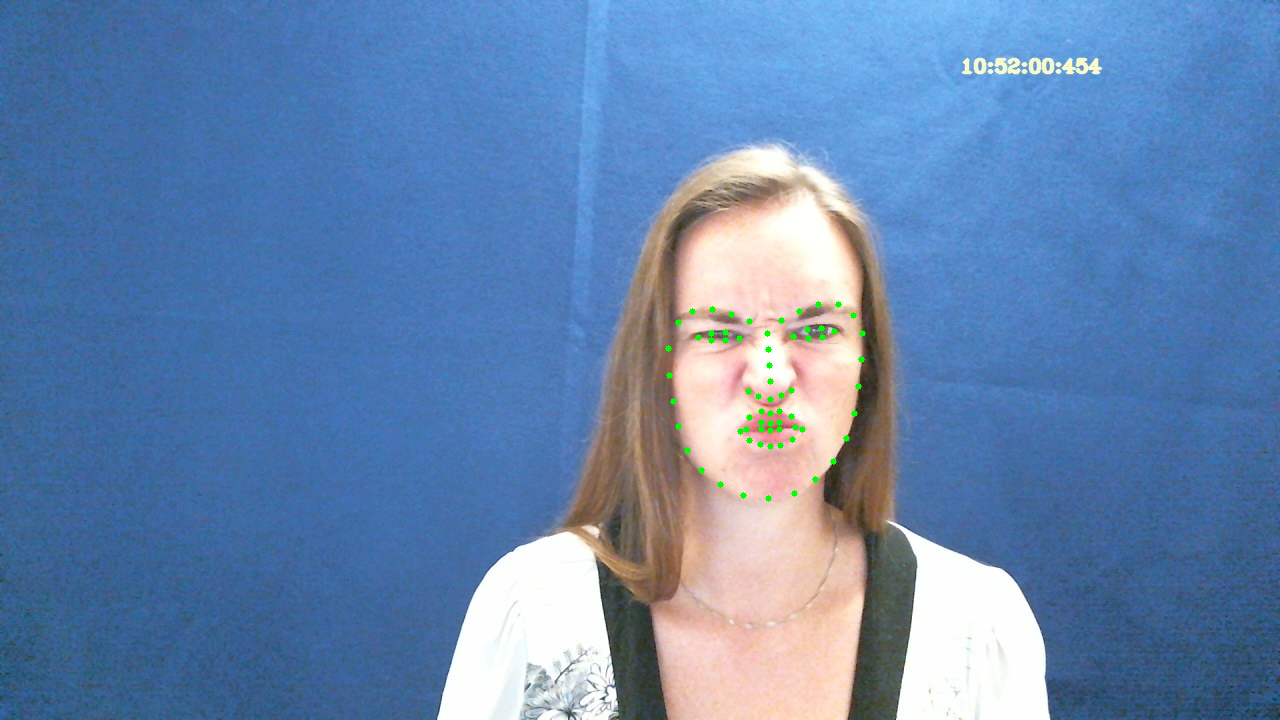

In [35]:
ps = cl_photo.points()
def show_points(ps):
    # Loop through all the points
    for n in range(0, 68):
      x = ps.part(n).x
      y = ps.part(n).y
      # Draw a circle
      cv2.circle(img=photo, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)

    cv2_imshow(photo)
    cv2.waitKey(delay=0)
    cv2.destroyAllWindows()
show_points(ps)

In [5]:
images = [cv2.imread(file) for file in glob.glob('/content/drive/MyDrive/Emotions/d*.jpg')]

In [6]:
# Geometric Features of all Images
eccenter = []
for ima in images:
  image = IMAGE(ima)
  eccenter.append(image.geometric_feature())

**Stage Three:** Fuzzy Facial Component Inference System (FFCIS)

In [7]:
ee = eccenter[15]

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



0.6601334464627476

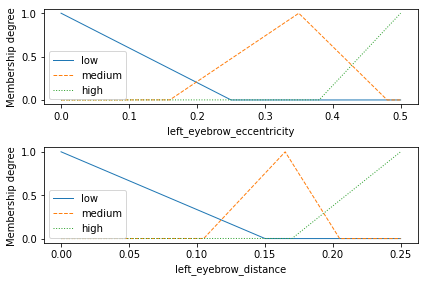

In [8]:
# Left Eyebrow
FS1 = FuzzySystem()

# Define fuzzy sets for the variable left_eyebrow_eccentricity    
l_eb_ec_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.25), term="low")
l_eb_ec_2 = FuzzySet(function=Triangular_MF(a=0.16, b=0.35, c=0.48), term="medium")
l_eb_ec_3 = FuzzySet(function=Triangular_MF(a=0.38, b=0.50, c=0.50), term="high")
left_eb_ec = LinguisticVariable([l_eb_ec_1, l_eb_ec_2, l_eb_ec_3], concept="left_eyebrow_eccentricity", universe_of_discourse=[0,0.5])
FS1.add_linguistic_variable("left_eyebrow_eccentricity", left_eb_ec)

# Define fuzzy sets for the variable left_eyebrow_distance         
l_eb_dis_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.150), term="low")
l_eb_dis_2 = FuzzySet(function=Triangular_MF(a=0.105, b=0.165, c=0.205), term="medium")
l_eb_dis_3 = FuzzySet(function=Triangular_MF(a=0.170, b=0.250, c=0.250), term="high")
left_eb_dis = LinguisticVariable([l_eb_dis_1, l_eb_dis_2, l_eb_dis_3], concept="left_eyebrow_distance", universe_of_discourse=[0,0.25])
FS1.add_linguistic_variable("left_eyebrow_distance", left_eb_dis)

# Define output fuzzy sets and linguistic variable               
l_eb_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.4), term="lower")
l_eb_2 = FuzzySet(function=Triangular_MF(a=0.3, b=0.5, c=0.7), term="normal")
l_eb_3 = FuzzySet(function=Triangular_MF(a=0.6, b=1, c=1), term="raised")
FS1.add_linguistic_variable("yCF1", LinguisticVariable([l_eb_1, l_eb_2, l_eb_3], universe_of_discourse=[0,1]))

R1_1 = "IF (left_eyebrow_eccentricity IS low) AND (left_eyebrow_distance IS low) THEN (yCF1 IS lower)"    
R2_1 = "IF (left_eyebrow_eccentricity IS low) AND (left_eyebrow_distance IS medium) THEN (yCF1 IS lower)"
R3_1 = "IF (left_eyebrow_eccentricity IS low) AND (left_eyebrow_distance IS high) THEN (yCF1 IS normal)"
R4_1 = "IF (left_eyebrow_eccentricity IS medium) AND (left_eyebrow_distance IS low) THEN (yCF1 IS lower)"
R5_1 = "IF (left_eyebrow_eccentricity IS medium) AND (left_eyebrow_distance IS medium) THEN (yCF1 IS normal)"
R6_1 = "IF (left_eyebrow_eccentricity IS medium) AND (left_eyebrow_distance IS high) THEN (yCF1 IS raised)"
R7_1 = "IF (left_eyebrow_eccentricity IS high) AND (left_eyebrow_distance IS low) THEN (yCF1 IS normal)"
R8_1 = "IF (left_eyebrow_eccentricity IS high) AND (left_eyebrow_distance IS medium) THEN (yCF1 IS raised)"
R9_1 = "IF (left_eyebrow_eccentricity IS high) AND (left_eyebrow_distance IS high) THEN (yCF1 IS raised)"

FS1.add_rules([R1_1, R2_1, R3_1, R4_1, R5_1, R6_1, R7_1, R8_1, R9_1])

# Set antecedents values
FS1.set_variable("left_eyebrow_eccentricity", ee[0][0])
FS1.set_variable("left_eyebrow_distance", ee[0][1])

fig, ax = plt.subplots(2)
left_eb_ec.draw(ax=ax[0])
left_eb_dis.draw(ax=ax[1])
plt.tight_layout()

YCF1 = FS1.Mamdani_inference(["yCF1"])["yCF1"]
YCF1

In [9]:
# Right Eyebrow
FS2 = FuzzySystem()

# Define fuzzy sets for the variable right_eyebrow_eccentricity      
r_eb_ec_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.25), term="low")
r_eb_ec_2 = FuzzySet(function=Triangular_MF(a=0.16, b=0.35, c=0.48), term="medium")
r_eb_ec_3 = FuzzySet(function=Triangular_MF(a=0.38, b=0.5, c=0.5), term="high")
right_eb_ec = LinguisticVariable([r_eb_ec_1, r_eb_ec_2, r_eb_ec_3], concept="right_eyebrow_eccentricity", universe_of_discourse=[0,0.50])
FS2.add_linguistic_variable("right_eyebrow_eccentricity", right_eb_ec)

# Define fuzzy sets for the variable right_eyebrow_distance           
r_eb_dis_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.150), term="low")
r_eb_dis_2 = FuzzySet(function=Triangular_MF(a=0.105, b=0.165, c=0.205), term="medium")
r_eb_dis_3 = FuzzySet(function=Triangular_MF(a=0.170, b=0.250, c=0.250), term="high")
right_eb_dis = LinguisticVariable([r_eb_dis_1, r_eb_dis_2, r_eb_dis_3], concept="right_eyebrow_distance", universe_of_discourse=[0,0.250])
FS2.add_linguistic_variable("right_eyebrow_distance", right_eb_dis)

r_eb_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.4), term="lower")
r_eb_2 = FuzzySet(function=Triangular_MF(a=0.3, b=0.5, c=0.7), term="normal")
r_eb_3 = FuzzySet(function=Triangular_MF(a=0.6, b=1, c=1), term="raised")
FS2.add_linguistic_variable("yCF2", LinguisticVariable([r_eb_1, r_eb_2, r_eb_3], universe_of_discourse=[0,1]))

R1_2 = "IF (right_eyebrow_eccentricity IS low) AND (right_eyebrow_distance IS low) THEN (yCF2 IS lower)"        
R2_2 = "IF (right_eyebrow_eccentricity IS low) AND (right_eyebrow_distance IS medium) THEN (yCF2 IS lower)"
R3_2 = "IF (right_eyebrow_eccentricity IS low) AND (right_eyebrow_distance IS high) THEN (yCF2 IS normal)"
R4_2 = "IF (right_eyebrow_eccentricity IS medium) AND (right_eyebrow_distance IS low) THEN (yCF2 IS lower)"
R5_2 = "IF (right_eyebrow_eccentricity IS medium) AND (right_eyebrow_distance IS medium) THEN (yCF2 IS normal)"
R6_2 = "IF (right_eyebrow_eccentricity IS medium) AND (right_eyebrow_distance IS high) THEN (yCF2 IS raised)"
R7_2 = "IF (right_eyebrow_eccentricity IS high) AND (right_eyebrow_distance IS low) THEN (yCF2 IS normal)"
R8_2 = "IF (right_eyebrow_eccentricity IS high) AND (right_eyebrow_distance IS medium) THEN (yCF2 IS raised)"
R9_2 = "IF (right_eyebrow_eccentricity IS high) AND (right_eyebrow_distance IS high) THEN (yCF2 IS raised)"

FS2.add_rules([R1_2, R2_2, R3_2, R4_2, R5_2, R6_2, R7_2, R8_2, R9_2])

# Set antecedents values
FS2.set_variable("right_eyebrow_eccentricity", ee[1][0])
FS2.set_variable("right_eyebrow_distance", ee[1][1])

YCF2 = FS2.Mamdani_inference(["yCF2"])["yCF2"]
YCF2

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



0.5095585564821722

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



0.702237112117018

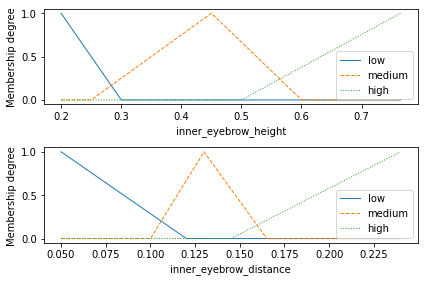

In [10]:
# Inner Eyebrow
FS3 = FuzzySystem()

# Define fuzzy sets for the variable inner_eyebrow_height        
i_eb_ec_1 = FuzzySet(function=Triangular_MF(a=0.20, b=0.20, c=0.30), term="low")
i_eb_ec_2 = FuzzySet(function=Triangular_MF(a=0.25, b=0.45, c=0.60), term="medium")
i_eb_ec_3 = FuzzySet(function=Triangular_MF(a=0.50, b=0.765, c=0.765), term="high")
inner_eb_h = LinguisticVariable([i_eb_ec_1, i_eb_ec_2, i_eb_ec_3], concept="inner_eyebrow_height", universe_of_discourse=[0.20,0.765])
FS3.add_linguistic_variable("inner_eyebrow_height", inner_eb_h)

# Define fuzzy sets for the variable inner_eyebrow_distance          
i_eb_dis_1 = FuzzySet(function=Triangular_MF(a=0.05, b=0.05, c=0.12), term="low")
i_eb_dis_2 = FuzzySet(function=Triangular_MF(a=0.10, b=0.13, c=0.165), term="medium")
i_eb_dis_3 = FuzzySet(function=Triangular_MF(a=0.145, b=0.24, c=0.24), term="high")
inner_eb_dis = LinguisticVariable([i_eb_dis_1, i_eb_dis_2, i_eb_dis_3], concept="inner_eyebrow_distance", universe_of_discourse=[0.05,0.24])
FS3.add_linguistic_variable("inner_eyebrow_distance", inner_eb_dis)

# Define output fuzzy sets and linguistic variable               
i_eb_1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.35, d=0.65), term="closer")
i_eb_2 = FuzzySet(function=Trapezoidal_MF(a=0.35, b=0.65, c=1, d=1), term="normal")
FS3.add_linguistic_variable("yCF3", LinguisticVariable([i_eb_1, i_eb_2], universe_of_discourse=[0,1]))

R1_3 = "IF (inner_eyebrow_height IS low) AND (inner_eyebrow_distance IS low) THEN (yCF3 IS closer)"        
R2_3 = "IF (inner_eyebrow_height IS low) AND (inner_eyebrow_distance IS medium) THEN (yCF3 IS normal)"
R3_3 = "IF (inner_eyebrow_height IS low) AND (inner_eyebrow_distance IS high) THEN (yCF3 IS normal)"
R4_3 = "IF (inner_eyebrow_height IS medium) AND (inner_eyebrow_distance IS low) THEN (yCF3 IS closer)"
R5_3 = "IF (inner_eyebrow_height IS medium) AND (inner_eyebrow_distance IS medium) THEN (yCF3 IS normal)"
R6_3 = "IF (inner_eyebrow_height IS medium) AND (inner_eyebrow_distance IS high) THEN (yCF3 IS normal)"
R7_3 = "IF (inner_eyebrow_height IS high) AND (inner_eyebrow_distance IS low) THEN (yCF3 IS closer)"
R8_3 = "IF (inner_eyebrow_height IS high) AND (inner_eyebrow_distance IS medium) THEN (yCF3 IS normal)"
R9_3 = "IF (inner_eyebrow_height IS high) AND (inner_eyebrow_distance IS high) THEN (yCF3 IS normal)"

FS3.add_rules([R1_3, R2_3, R3_3, R4_3, R5_3, R6_3, R7_3, R8_3, R9_3])

# Set antecedents values
FS3.set_variable("inner_eyebrow_height", ee[2][0])
FS3.set_variable("inner_eyebrow_distance", ee[2][1])

fig, ax = plt.subplots(2)
inner_eb_h.draw(ax=ax[0])
inner_eb_dis.draw(ax=ax[1])
plt.tight_layout()

YCF3 = FS3.Mamdani_inference(["yCF3"])["yCF3"]
YCF3

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



0.3621973126821213

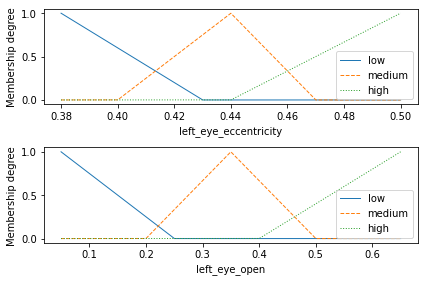

In [11]:
# Left Eye
FS4 = FuzzySystem()

# Define fuzzy sets for the variable left_eye_eccentricity     
l_e_ec_1 = FuzzySet(function=Triangular_MF(a=0.38, b=0.38, c=0.43), term="low")
l_e_ec_2 = FuzzySet(function=Triangular_MF(a=0.40, b=0.44, c=0.47), term="medium")
l_e_ec_3 = FuzzySet(function=Triangular_MF(a=0.44, b=0.5, c=0.5), term="high")
left_e_ec = LinguisticVariable([l_e_ec_1, l_e_ec_2, l_e_ec_3], concept="left_eye_eccentricity", universe_of_discourse=[0.38,0.5])
FS4.add_linguistic_variable("left_eye_eccentricity", left_e_ec)

# Define fuzzy sets for the variable left_eye_open     
l_e_op_1 = FuzzySet(function=Triangular_MF(a=0.05, b=0.05, c=0.25), term="low")
l_e_op_2 = FuzzySet(function=Triangular_MF(a=0.20, b=0.35, c=0.50), term="medium")
l_e_op_3 = FuzzySet(function=Triangular_MF(a=0.40, b=0.65, c=0.65), term="high")
left_e_op = LinguisticVariable([l_e_op_1, l_e_op_2, l_e_op_3], concept="left_eye_open", universe_of_discourse=[0.05,0.65])
FS4.add_linguistic_variable("left_eye_open", left_e_op)

# Define output fuzzy sets and linguistic variable       
l_e_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.45), term="narrow")
l_e_2 = FuzzySet(function=Triangular_MF(a=0.3, b=0.5, c=0.6), term="normal")
l_e_3 = FuzzySet(function=Triangular_MF(a=0.55, b=1, c=1), term="wide")
FS4.add_linguistic_variable("yCF4", LinguisticVariable([l_e_1, l_e_2, l_e_3], universe_of_discourse=[0,1]))

R1_4 = "IF (left_eye_eccentricity IS low) AND (left_eye_open IS low) THEN (yCF4 IS normal)"    
R2_4 = "IF (left_eye_eccentricity IS low) AND (left_eye_open IS medium) THEN (yCF4 IS narmal)"
R3_4 = "IF (left_eye_eccentricity IS low) AND (left_eye_open IS high) THEN (yCF4 IS wide)"
R4_4 = "IF (left_eye_eccentricity IS medium) AND (left_eye_open IS low) THEN (yCF4 IS narrow)"
R5_4 = "IF (left_eye_eccentricity IS medium) AND (left_eye_open IS medium) THEN (yCF4 IS normal)"
R6_4 = "IF (left_eye_eccentricity IS medium) AND (left_eye_open IS high) THEN (yCF4 IS wide)"
R7_4 = "IF (left_eye_eccentricity IS high) AND (left_eye_open IS low) THEN (yCF4 IS narrow)"
R8_4 = "IF (left_eye_eccentricity IS high) AND (left_eye_open IS medium) THEN (yCF4 IS normal)"
R9_4 = "IF (left_eye_eccentricity IS high) AND (left_eye_open IS high) THEN (yCF4 IS normal)"

FS4.add_rules([R1_4, R2_4, R3_4, R4_4, R5_4, R6_4, R7_4, R8_4, R9_4])

# Set antecedents values
FS4.set_variable("left_eye_eccentricity", ee[3][0])
FS4.set_variable("left_eye_open", ee[3][1])

fig, ax = plt.subplots(2)
left_e_ec.draw(ax=ax[0])
left_e_op.draw(ax=ax[1])
plt.tight_layout()

YCF4 = FS4.Mamdani_inference(["yCF4"])["yCF4"]
YCF4

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



0.39432791240803355

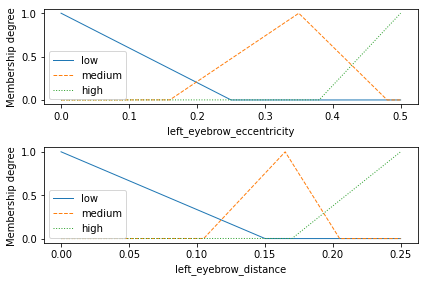

In [12]:
# Right Eye
FS5 = FuzzySystem()

# Define fuzzy sets for the variable right_eyebrow_eccentricity           
r_e_ec_1 = FuzzySet(function=Triangular_MF(a=0.38, b=0.38, c=0.43), term="low")
r_e_ec_2 = FuzzySet(function=Triangular_MF(a=0.40, b=0.44, c=0.47), term="medium")
r_e_ec_3 = FuzzySet(function=Triangular_MF(a=0.44, b=0.50, c=0.50), term="high")
right_e_ec = LinguisticVariable([r_e_ec_1, r_e_ec_2, r_e_ec_3], concept="right_eye_eccentricity", universe_of_discourse=[0.05,0.50])
FS5.add_linguistic_variable("right_eye_eccentricity", right_e_ec)

# Define fuzzy sets for the variable right_eyebrow_open           
r_e_op_1 = FuzzySet(function=Triangular_MF(a=0.05, b=0.05, c=0.25), term="low")
r_e_op_2 = FuzzySet(function=Triangular_MF(a=0.20, b=0.35, c=0.50), term="medium")
r_e_op_3 = FuzzySet(function=Triangular_MF(a=0.40, b=0.65, c=0.65), term="high")
right_e_op = LinguisticVariable([r_e_op_1, r_e_op_2, r_e_op_3], concept="right_eye_open", universe_of_discourse=[0.02,0.65])
FS5.add_linguistic_variable("right_eye_open", right_e_op)

# Define output fuzzy sets and linguistic variable          
r_e_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.45), term="narrow")
r_e_2 = FuzzySet(function=Triangular_MF(a=0.35, b=0.5, c=0.6), term="normal")
r_e_3 = FuzzySet(function=Triangular_MF(a=0.55, b=1, c=1), term="wide")
FS5.add_linguistic_variable("yCF5", LinguisticVariable([r_e_1, r_e_2, r_e_3], universe_of_discourse=[0,1]))

R1_5 = "IF (right_eye_eccentricity IS low) AND (right_eye_open IS low) THEN (yCF5 IS normal)"           
R2_5 = "IF (right_eye_eccentricity IS low) AND (right_eye_open IS medium) THEN (yCF5 IS normal)"
R3_5 = "IF (right_eye_eccentricity IS low) AND (right_eye_open IS high) THEN (yCF5 IS wide)"
R4_5 = "IF (right_eye_eccentricity IS medium) AND (right_eye_open IS low) THEN (yCF5 IS narrow)"
R5_5 = "IF (right_eye_eccentricity IS medium) AND (right_eye_open IS medium) THEN (yCF5 IS normal)"
R6_5 = "IF (right_eye_eccentricity IS medium) AND (right_eye_open IS high) THEN (yCF5 IS wide)"
R7_5 = "IF (right_eye_eccentricity IS high) AND (right_eye_open IS low) THEN (yCF5 IS narrow)"
R8_5 = "IF (right_eye_eccentricity IS high) AND (right_eye_open IS medium) THEN (yCF5 IS normal)"
R9_5 = "IF (right_eye_eccentricity IS high) AND (right_eye_open IS high) THEN (yCF5 IS normal)"

FS5.add_rules([R1_5, R2_5, R3_5, R4_5, R5_5, R6_5, R7_5, R8_5, R9_5])

# Set antecedents values
FS5.set_variable("right_eye_eccentricity", ee[4][0])
FS5.set_variable("right_eye_open", ee[4][1])

fig, ax = plt.subplots(2)
left_eb_ec.draw(ax=ax[0])
left_eb_dis.draw(ax=ax[1])
plt.tight_layout()

YCF5 = FS5.Mamdani_inference(["yCF5"])["yCF5"]
YCF5

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



0.6445996662918322

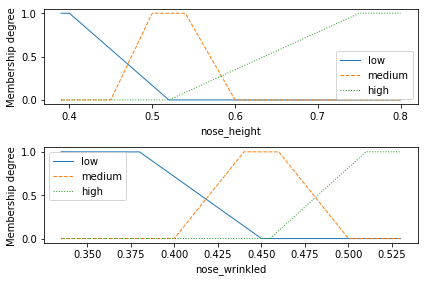

In [13]:
# Nose
FS6 = FuzzySystem()

# Define fuzzy sets for the variable nose_height          
n_h_1 = FuzzySet(function=Trapezoidal_MF(a=0.39, b=0.39, c=0.40, d=0.52), term="low")
n_h_2 = FuzzySet(function=Trapezoidal_MF(a=0.45, b=0.50, c=0.54, d=0.60), term="medium")
n_h_3 = FuzzySet(function=Trapezoidal_MF(a=0.52, b=0.75, c=0.80, d=0.80), term="high")
nose_h = LinguisticVariable([n_h_1, n_h_2, n_h_3], concept="nose_height", universe_of_discourse=[0.39, 0.80])
FS6.add_linguistic_variable("nose_height", nose_h)

# Define fuzzy sets for the variable nose_wrinkled           
n_w_1 = FuzzySet(function=Trapezoidal_MF(a=0.335, b=0.335, c=0.380, d=0.450), term="low")
n_w_2 = FuzzySet(function=Trapezoidal_MF(a=0.400, b=0.440, c=0.460, d=0.500), term="medium")
n_w_3 = FuzzySet(function=Trapezoidal_MF(a=0.455, b=0.510, c=0.530, d=0.530), term="high")
nose_wr = LinguisticVariable([n_w_1, n_w_2, n_w_3], concept="nose_wrinkled", universe_of_discourse=[0.335, 0.530])
FS6.add_linguistic_variable("nose_wrinkled", nose_wr)

# Define output fuzzy sets and linguistic variable     
n_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.65), term="normal")
n_2 = FuzzySet(function=Triangular_MF(a=0.35, b=1, c=1), term="wrinkled")
FS6.add_linguistic_variable("yCF6", LinguisticVariable([n_1, n_2], universe_of_discourse=[0,1]))

R1_6 = "IF (nose_height IS low) AND (nose_wrinkled IS low) THEN (yCF6 IS wrinkled)"   
R2_6 = "IF (nose_height IS low) AND (nose_wrinkled IS medium) THEN (yCF6 IS normal)"
R3_6 = "IF (nose_height IS low) AND (nose_wrinkled IS high) THEN (yCF6 IS normal)"
R4_6 = "IF (nose_height IS medium) AND (nose_wrinkled IS low) THEN (yCF6 IS wrinkled)"
R5_6 = "IF (nose_height IS medium) AND (nose_wrinkled IS medium) THEN (yCF6 IS wrinkled)"
R6_6 = "IF (nose_height IS medium) AND (nose_wrinkled IS high) THEN (yCF6 IS normal)"
R7_6 = "IF (nose_height IS high) AND (nose_wrinkled IS low) THEN (yCF6 IS wrinkled)"
R8_6 = "IF (nose_height IS high) AND (nose_wrinkled IS medium) THEN (yCF6 IS normal)"
R9_6 = "IF (nose_height IS high) AND (nose_wrinkled IS high) THEN (yCF6 IS normal)"

FS6.add_rules([R1_6, R2_6, R3_6, R4_6, R5_6, R6_6, R7_6, R8_6, R9_6])

# Set antecedents values
FS6.set_variable("nose_height", ee[5][0])
FS6.set_variable("nose_wrinkled", ee[5][1])

fig, ax = plt.subplots(2)
nose_h.draw(ax=ax[0])
nose_wr.draw(ax=ax[1])
plt.tight_layout()

YCF6 = FS6.Mamdani_inference(["yCF6"])["yCF6"]
YCF6

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



0.8447036566409691

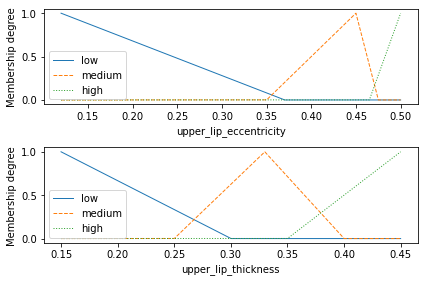

In [14]:
# Upper Lip
FS7 = FuzzySystem()

# Define fuzzy sets for the variable upper_lip_eccentricity     
u_l_ec_1 = FuzzySet(function=Triangular_MF(a=0.120, b=0.120, c=0.370), term="low")
u_l_ec_2 = FuzzySet(function=Triangular_MF(a=0.350, b=0.450, c=0.475), term="medium")
u_l_ec_3 = FuzzySet(function=Triangular_MF(a=0.465, b=0.5, c=0.5), term="high")
upper_lip_ec = LinguisticVariable([u_l_ec_1, u_l_ec_2, u_l_ec_3], concept="upper_lip_eccentricity", universe_of_discourse=[0.12,0.50])
FS7.add_linguistic_variable("upper_lip_eccentricity", upper_lip_ec)

# Define fuzzy sets for the variable upper_lip_thickness    
u_l_th_1 = FuzzySet(function=Triangular_MF(a=0.15, b=0.15, c=0.30), term="low")
u_l_th_2 = FuzzySet(function=Triangular_MF(a=0.25, b=0.33, c=0.40), term="medium")
u_l_th_3 = FuzzySet(function=Triangular_MF(a=0.35, b=0.45, c=0.45), term="high")
upper_lip_thick = LinguisticVariable([u_l_th_1, u_l_th_2, u_l_th_3], concept="upper_lip_thickness", universe_of_discourse=[0.15,0.45])
FS7.add_linguistic_variable("upper_lip_thickness", upper_lip_thick)

# Define output fuzzy sets and linguistic variable     
u_l_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.4), term="thin")
u_l_2 = FuzzySet(function=Triangular_MF(a=0.3, b=0.5, c=0.7), term="normal")
u_l_3 = FuzzySet(function=Triangular_MF(a=0.6, b=1, c=1), term="thick")
FS7.add_linguistic_variable("yCF7", LinguisticVariable([u_l_1, u_l_2, u_l_3], universe_of_discourse=[0,1]))

R1_7 = "IF (upper_lip_eccentricity IS low) AND (upper_lip_thickness IS low) THEN (yCF7 IS thin)"   
R2_7 = "IF (upper_lip_eccentricity IS low) AND (upper_lip_thickness IS medium) THEN (yCF7 IS normal)"
R3_7 = "IF (upper_lip_eccentricity IS low) AND (upper_lip_thickness IS high) THEN (yCF7 IS thick)"
R4_7 = "IF (upper_lip_eccentricity IS medium) AND (upper_lip_thickness IS low) THEN (yCF7 IS thin)"
R5_7 = "IF (upper_lip_eccentricity IS medium) AND (upper_lip_thickness IS medium) THEN (yCF7 IS normal)"
R6_7 = "IF (upper_lip_eccentricity IS medium) AND (upper_lip_thickness IS high) THEN (yCF7 IS thick)"
R7_7 = "IF (upper_lip_eccentricity IS high) AND (upper_lip_thickness IS low) THEN (yCF7 IS thin)"
R8_7 = "IF (upper_lip_eccentricity IS high) AND (upper_lip_thickness IS medium) THEN (yCF7 IS normal)"
R9_7 = "IF (upper_lip_eccentricity IS high) AND (upper_lip_thickness IS high) THEN (yCF7 IS thick)"

FS7.add_rules([R1_7, R2_7, R3_7, R4_7, R5_7, R6_7, R7_7, R8_7, R9_7])

# Set antecedents values
FS7.set_variable("upper_lip_eccentricity", ee[6][0])
FS7.set_variable("upper_lip_thickness", ee[6][1])

fig, ax = plt.subplots(2)
upper_lip_ec.draw(ax=ax[0])
upper_lip_thick.draw(ax=ax[1])
plt.tight_layout()

YCF7 = FS7.Mamdani_inference(["yCF7"])["yCF7"]
YCF7

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



0.8636651025127783

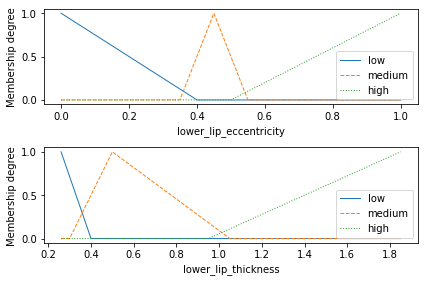

In [15]:
# Lower Lip
FS8 = FuzzySystem()
# Define fuzzy sets for the variable lower_lip_eccentricity      
l_l_ec_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.40), term="low")
l_l_ec_2 = FuzzySet(function=Triangular_MF(a=0.35, b=0.45, c=0.55), term="medium")
l_l_ec_3 = FuzzySet(function=Triangular_MF(a=0.50, b=1, c=1), term="high")
lower_lip_ec = LinguisticVariable([l_l_ec_1, l_l_ec_2, l_l_ec_3], concept="lower_lip_eccentricity", universe_of_discourse=[0,1])
FS8.add_linguistic_variable("lower_lip_eccentricity", lower_lip_ec)

# Define fuzzy sets for the variable lower_lip_thickness     
l_l_th_1 = FuzzySet(function=Triangular_MF(a=0.26, b=0.26, c=0.40), term="low")
l_l_th_2 = FuzzySet(function=Triangular_MF(a=0.30, b=0.50, c=1.05), term="medium")
l_l_th_3 = FuzzySet(function=Triangular_MF(a=0.95, b=1.85, c=1.85), term="high")
lower_lip_thick = LinguisticVariable([l_l_th_1, l_l_th_2, l_l_th_3], concept="lower_lip_thickness", universe_of_discourse=[0.26,1.85])
FS8.add_linguistic_variable("lower_lip_thickness", lower_lip_thick)

# Define output fuzzy sets and linguistic variable
l_l_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.4), term="thin")
l_l_2 = FuzzySet(function=Triangular_MF(a=0.3, b=0.5, c=0.8), term="normal")
l_l_3 = FuzzySet(function=Triangular_MF(a=0.6, b=1, c=1), term="thick")
FS8.add_linguistic_variable("yCF8", LinguisticVariable([l_l_1, l_l_2, l_l_3], universe_of_discourse=[0,1]))

R1_8 = "IF (lower_lip_eccentricity IS low) AND (lower_lip_thickness IS low) THEN (yCF8 IS thin)"     #
R2_8 = "IF (lower_lip_eccentricity IS low) AND (lower_lip_thickness IS medium) THEN (yCF8 IS thick)"
R3_8 = "IF (lower_lip_eccentricity IS low) AND (lower_lip_thickness IS high) THEN (yCF8 IS thick)"
R4_8 = "IF (lower_lip_eccentricity IS medium) AND (lower_lip_thickness IS low) THEN (yCF8 IS thin)"
R5_8 = "IF (lower_lip_eccentricity IS medium) AND (lower_lip_thickness IS medium) THEN (yCF8 IS thick)"
R6_8 = "IF (lower_lip_eccentricity IS medium) AND (lower_lip_thickness IS high) THEN (yCF8 IS normal)"
R7_8 = "IF (lower_lip_eccentricity IS high) AND (lower_lip_thickness IS low) THEN (yCF8 IS thin)"
R8_8 = "IF (lower_lip_eccentricity IS high) AND (lower_lip_thickness IS medium) THEN (yCF8 IS normal)"
R9_8 = "IF (lower_lip_eccentricity IS high) AND (lower_lip_thickness IS high) THEN (yCF8 IS thick)"

FS8.add_rules([R1_8, R2_8, R3_8, R4_8, R5_8, R6_8, R7_8, R8_8, R9_8])

# Set antecedents values
FS8.set_variable("lower_lip_eccentricity", ee[7][0])
FS8.set_variable("lower_lip_thickness", ee[7][1])

fig, ax = plt.subplots(2)
lower_lip_ec.draw(ax=ax[0])
lower_lip_thick.draw(ax=ax[1])
plt.tight_layout()

YCF8 = FS8.Mamdani_inference(["yCF8"])["yCF8"]
YCF8

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



0.15540860841944631

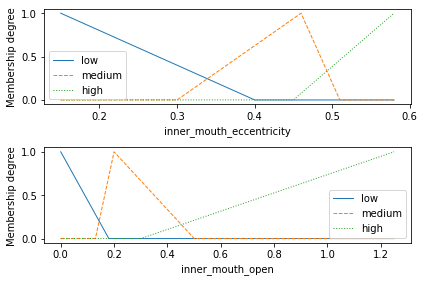

In [50]:
# Inner Mouth
FS9 = FuzzySystem()

# Define fuzzy sets for the variable inner_mouth_eccentricity    
i_m_ec_1 = FuzzySet(function=Triangular_MF(a=0.15, b=0.15, c=0.40), term="low")
i_m_ec_2 = FuzzySet(function=Triangular_MF(a=0.3, b=0.46, c=0.51), term="medium")
i_m_ec_3 = FuzzySet(function=Triangular_MF(a=0.45, b=0.58, c=0.58), term="high")

inner_m_ec = LinguisticVariable([i_m_ec_1, i_m_ec_2, i_m_ec_3], concept="inner_mouth_eccentricity", universe_of_discourse=[0.15,0.58])
FS9.add_linguistic_variable("inner_mouth_eccentricity", inner_m_ec)

# Define fuzzy sets for the variable inner_mouth_open 
i_m_op_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.18), term="low")
i_m_op_2 = FuzzySet(function=Triangular_MF(a=0.13, b=0.20, c=0.50), term="medium")
i_m_op_3 = FuzzySet(function=Triangular_MF(a=0.30, b=1.25, c=1.25), term="high")

inner_m_op = LinguisticVariable([i_m_op_1, i_m_op_2, i_m_op_3], concept="inner_mouth_open", universe_of_discourse=[0,1.25])
FS9.add_linguistic_variable("inner_mouth_open", inner_m_op)

# Define output fuzzy sets and linguistic variable
i_m_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.20), term="close")
i_m_2 = FuzzySet(function=Triangular_MF(a=0.10, b=0.20, c=0.30), term="narrow")
i_m_3 = FuzzySet(function=Triangular_MF(a=0.20, b=0.30, c=0.50), term="normal")
i_m_4 = FuzzySet(function=Triangular_MF(a=0.35, b=0.40, c=0.75), term="open")
i_m_5 = FuzzySet(function=Triangular_MF(a=0.65, b=1, c=1), term="widely_open")

FS9.add_linguistic_variable("yCF9", LinguisticVariable([i_m_1, i_m_2, i_m_3, i_m_4, i_m_5], universe_of_discourse=[0,1]))

# R1_9 = "IF (inner_mouth_eccentricity IS low) AND (inner_mouth_open IS low) THEN (yCF9 IS narrow)"
# R2_9 = "IF (inner_mouth_eccentricity IS low) AND (inner_mouth_open IS medium) THEN (yCF9 IS open)"
# R3_9 = "IF (inner_mouth_eccentricity IS low) AND (inner_mouth_open IS high) THEN (yCF9 IS widely_open)"#
# R4_9 = "IF (inner_mouth_eccentricity IS medium) AND (inner_mouth_open IS low) THEN (yCF9 IS narrow)"
# R5_9 = "IF (inner_mouth_eccentricity IS medium) AND (inner_mouth_open IS medium) THEN (yCF9 IS open)"
# R6_9 = "IF (inner_mouth_eccentricity IS medium) AND (inner_mouth_open IS high) THEN (yCF9 IS open)"
# R7_9 = "IF (inner_mouth_eccentricity IS high) AND (inner_mouth_open IS low) THEN (yCF9 IS close)"#
# R8_9 = "IF (inner_mouth_eccentricity IS high) AND (inner_mouth_open IS medium) THEN (yCF9 IS narrow )"
# R9_9 = "IF (inner_mouth_eccentricity IS high) AND (inner_mouth_open IS high) THEN (yCF9 IS normal)"

R1_9 = "IF (inner_mouth_eccentricity IS low) AND (inner_mouth_open IS low) THEN (yCF9 IS close)"
R2_9 = "IF (inner_mouth_eccentricity IS low) AND (inner_mouth_open IS medium) THEN (yCF9 IS open)"
R3_9 = "IF (inner_mouth_eccentricity IS low) AND (inner_mouth_open IS high) THEN (yCF9 IS open)"
R4_9 = "IF (inner_mouth_eccentricity IS medium) AND (inner_mouth_open IS low) THEN (yCF9 IS close)"
R5_9 = "IF (inner_mouth_eccentricity IS medium) AND (inner_mouth_open IS medium) THEN (yCF9 IS open)"
R6_9 = "IF (inner_mouth_eccentricity IS medium) AND (inner_mouth_open IS high) THEN (yCF9 IS widely_open)"
R7_9 = "IF (inner_mouth_eccentricity IS high) AND (inner_mouth_open IS low) THEN (yCF9 IS narrow)"
R8_9 = "IF (inner_mouth_eccentricity IS high) AND (inner_mouth_open IS medium) THEN (yCF9 IS normal )"
R9_9 = "IF (inner_mouth_eccentricity IS high) AND (inner_mouth_open IS high) THEN (yCF9 IS widely_open)"
FS9.add_rules([R1_9, R2_9, R3_9, R4_9, R5_9, R6_9, R7_9, R8_9, R9_9])

# Set antecedents values
FS9.set_variable("inner_mouth_eccentricity", ee[8][0])
FS9.set_variable("inner_mouth_open", ee[8][1])

fig, ax = plt.subplots(2)
inner_m_ec.draw(ax=ax[0])
inner_m_op.draw(ax=ax[1])
plt.tight_layout()

YCF9 = FS9.Mamdani_inference(["yCF9"])["yCF9"]
YCF9

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



0.46722228797490456

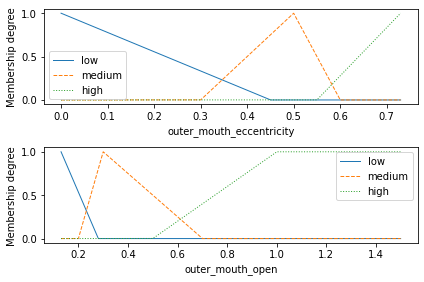

In [17]:
# Outer Mouth
FS10 = FuzzySystem()

# Define fuzzy sets for the variable outer_mouth_eccentricity   
o_m_ec_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.45), term="low")
o_m_ec_2 = FuzzySet(function=Triangular_MF(a=0.30, b=0.50, c=0.60), term="medium")
o_m_ec_3 = FuzzySet(function=Triangular_MF(a=0.55, b=0.73, c=0.73), term="high")
outer_m_ec = LinguisticVariable([o_m_ec_1, o_m_ec_2, o_m_ec_3], concept="outer_mouth_eccentricity", universe_of_discourse=[0,0.73])
FS10.add_linguistic_variable("outer_mouth_eccentricity", outer_m_ec)

# Define fuzzy sets for the variable outer_mouth_open
o_m_op_1 = FuzzySet(function=Triangular_MF(a=0.13, b=0.13, c=0.28), term="low")
o_m_op_2 = FuzzySet(function=Triangular_MF(a=0.2, b=0.3, c=0.7), term="medium")
o_m_op_3 = FuzzySet(function=Triangular_MF(a=0.5, b=1, c=1), term="high")
outer_m_op = LinguisticVariable([o_m_op_1, o_m_op_2, o_m_op_3], concept="outer_mouth_open", universe_of_discourse=[0.13,1.5])
FS10.add_linguistic_variable("outer_mouth_open", outer_m_op)

# Define output fuzzy sets and linguistic variable      
o_m_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.25), term="close")
o_m_2 = FuzzySet(function=Triangular_MF(a=0.15, b=0.23, c=0.40), term="narrow")
o_m_3 = FuzzySet(function=Triangular_MF(a=0.30, b=0.45, c=0.65), term="normal")
o_m_4 = FuzzySet(function=Triangular_MF(a=0.50, b=0.65, c=0.90), term="open")
o_m_5 = FuzzySet(function=Triangular_MF(a=0.65, b=1, c=1), term="widely_open")

FS10.add_linguistic_variable("yCF10", LinguisticVariable([o_m_1, o_m_2, o_m_3, o_m_4, o_m_5], universe_of_discourse=[0,1]))

R1_10 = "IF (outer_mouth_eccentricity IS low) AND (outer_mouth_open IS low) THEN (yCF10 IS narrow)"  
R2_10 = "IF (outer_mouth_eccentricity IS low) AND (outer_mouth_open IS medium) THEN (yCF10 IS open)"
R3_10 = "IF (outer_mouth_eccentricity IS low) AND (outer_mouth_open IS high) THEN (yCF10 IS widely_open)"
R4_10 = "IF (outer_mouth_eccentricity IS medium) AND (outer_mouth_open IS low) THEN (yCF10 IS narrow)"
R5_10 = "IF (outer_mouth_eccentricity IS medium) AND (outer_mouth_open IS medium) THEN (yCF10 IS normal)"
R6_10 = "IF (outer_mouth_eccentricity IS medium) AND (outer_mouth_open IS high) THEN (yCF10 IS open)"
R7_10 = "IF (outer_mouth_eccentricity IS high) AND (outer_mouth_open IS low) THEN (yCF10 IS close)"
R8_10 = "IF (outer_mouth_eccentricity IS high) AND (outer_mouth_open IS medium) THEN (yCF10 IS narrow)"
R9_10 = "IF (outer_mouth_eccentricity IS high) AND (outer_mouth_open IS high) THEN (yCF10 IS open)"

FS10.add_rules([R1_10, R2_10, R3_10, R4_10, R5_10, R6_10, R7_10, R8_10, R9_10])

# Set antecedents values
FS10.set_variable("outer_mouth_eccentricity", ee[9][0])
FS10.set_variable("outer_mouth_open", ee[9][1])

fig, ax = plt.subplots(2)
outer_m_ec.draw(ax=ax[0])
outer_m_op.draw(ax=ax[1])
plt.tight_layout()

YCF10 = FS10.Mamdani_inference(["yCF10"])["yCF10"]
YCF10

In [48]:
FS_Anger = FuzzySystem() # OK

FS_Anger.add_linguistic_variable("yCF3", LinguisticVariable([i_eb_1, i_eb_2])) # inner eyebrow
FS_Anger.add_linguistic_variable("yCF9", LinguisticVariable([i_m_1, i_m_2, i_m_3, i_m_4, i_m_5])) #inner mouth
FS_Anger.add_linguistic_variable("yCF4", LinguisticVariable([l_e_1, l_e_2, l_e_3])) # left eye
FS_Anger.add_linguistic_variable("yCF5", LinguisticVariable([r_e_1, r_e_2, r_e_3])) # Right eye

Rules_a = []
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF9 IS close) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF9 IS narrow) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF9 IS open) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF9 IS widely_open) THEN (angry IS Extreme)") #
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) AND (yCF9 IS close) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) AND (yCF9 IS narrow) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) AND (yCF9 IS open) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF9 IS close) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF9 IS narrow) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF9 IS open) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#

Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF9 IS close) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF9 IS narrow) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF9 IS open) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF9 IS close) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF9 IS narrow) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF9 IS open) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF9 IS widely_open) THEN (angry IS Moderate)")#
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS wide) AND (yCF9 IS close) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS wide) AND (yCF9 IS narrow) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS wide) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS wide) AND (yCF9 IS open) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS normal) AND (yCF5 IS wide) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#

Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS narrow) AND (yCF9 IS close) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS narrow) AND (yCF9 IS narrow) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS narrow) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS narrow) AND (yCF9 IS open) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS narrow) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS normal) AND (yCF9 IS close) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS normal) AND (yCF9 IS narrow) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS normal) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS normal) AND (yCF9 IS open) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS normal) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF9 IS close) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF9 IS narrow) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF9 IS open) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#

Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF9 IS close) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF9 IS narrow) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF9 IS open) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF9 IS widely_open) THEN (angry IS Extreme)") #
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) AND (yCF9 IS close) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) AND (yCF9 IS narrow) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) AND (yCF9 IS open) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF9 IS close) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF9 IS narrow) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF9 IS open) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#

Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF9 IS close) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF9 IS narrow) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF9 IS open) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF9 IS close) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF9 IS narrow) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF9 IS open) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS wide) AND (yCF9 IS close) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS wide) AND (yCF9 IS narrow) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS wide) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS wide) AND (yCF9 IS open) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS normal) AND (yCF5 IS wide) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#

Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS narrow) AND (yCF9 IS close) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS narrow) AND (yCF9 IS narrow) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS narrow) AND (yCF9 IS normal) THEN (angry IS Slight)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS narrow) AND (yCF9 IS open) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS narrow) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS normal) AND (yCF9 IS close) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS normal) AND (yCF9 IS narrow) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS normal) AND (yCF9 IS normal) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS normal) AND (yCF9 IS open) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS normal) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF9 IS close) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF9 IS narrow) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF9 IS normal) THEN (angry IS Moderate)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF9 IS open) THEN (angry IS Extreme)")
Rules_a.append("IF (yCF3 IS closer) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF9 IS widely_open) THEN (angry IS Extreme)")#
FS_Anger.add_rules(Rules_a)

FS_Anger.set_crisp_output_value("Slight", 0)
FS_Anger.set_crisp_output_value("Moderate", 0.5)
FS_Anger.set_crisp_output_value("Extreme",1)

FS_Anger.set_variable("yCF4", YCF4)
FS_Anger.set_variable("yCF5", YCF5)
FS_Anger.set_variable("yCF3", YCF3)
FS_Anger.set_variable("yCF9", YCF9)

em_angry = FS_Anger.Sugeno_inference(["angry"])["angry"]
print('Amount of angry is', em_angry)

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type
Amount of angry is 0.10840194080195448


In [52]:
FS_Disgust = FuzzySystem() # OK

FS_Disgust.add_linguistic_variable("yCF1", LinguisticVariable([l_eb_1, l_eb_2, l_eb_3])) # left eyebrow
FS_Disgust.add_linguistic_variable("yCF2", LinguisticVariable([r_eb_1, r_eb_2, r_eb_3])) # Right eyebrow
FS_Disgust.add_linguistic_variable("yCF6", LinguisticVariable([n_1, n_2])) # nose
FS_Disgust.add_linguistic_variable("yCF9", LinguisticVariable([i_m_1, i_m_2, i_m_3, i_m_4, i_m_5])) #inner mouth

Rules_d = []
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF9 IS normal) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF9 IS open) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF9 IS widely_open) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF9 IS normal) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF9 IS open) THEN (disgust IS Extreme)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF9 IS widely_open) THEN (disgust IS Extreme)")#
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF9 IS normal) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF9 IS open) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF9 IS widely_open) THEN (disgust IS Slight)")#
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (disgust IS Extreme)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF9 IS normal) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF9 IS open) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS normal) AND (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF9 IS widely_open) THEN (disgust IS Moderate)")

Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS lower) AND (yCF2 IS lower) AND (yCF9 IS close) THEN (disgust IS Extreme)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS lower) AND (yCF2 IS lower) AND (yCF9 IS narrow) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS lower) AND (yCF2 IS lower) AND (yCF9 IS normal) OR (yCF9 IS open) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS lower) AND (yCF2 IS lower) AND (yCF9 IS widely_open) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF9 IS normal) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF9 IS open) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF9 IS widely_open) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF9 IS close) THEN (disgust IS Extreme)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF9 IS narrow) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF9 IS normal) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF9 IS open) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF9 IS widely_open) THEN (disgust IS Slight)")#
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF9 IS close) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF9 IS narrow) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF9 IS normal) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF9 IS open) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF9 IS widely_open) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF9 IS normal) THEN (disgust IS Slight)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF9 IS open) THEN (disgust IS Extreme)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF9 IS widely_open) THEN (disgust IS Moderate)")#
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF9 IS close) THEN (disgust IS Extreme)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF9 IS narrow) THEN (disgust IS Extreme)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF9 IS normal) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF9 IS open) THEN (disgust IS Moderate)")
Rules_d.append("IF (yCF6 IS wrinkled) AND (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF9 IS widely_open) THEN (disgust IS Moderate)")#
FS_Disgust.add_rules(Rules_d)

FS_Disgust.set_crisp_output_value("Slight", 0)
FS_Disgust.set_crisp_output_value("Moderate", 0.5)
FS_Disgust.set_crisp_output_value("Extreme", 1)

FS_Disgust.set_variable("yCF1", YCF1)
FS_Disgust.set_variable("yCF2", YCF2)
FS_Disgust.set_variable("yCF6", YCF6)
FS_Disgust.set_variable("yCF9", YCF9)

em_disgust = FS_Disgust.Sugeno_inference(["disgust"])["disgust"]
print('Amount of disgust is', em_disgust)

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type
Amount of disgust is 0.4926556072275476


In [41]:
FS_Fear = FuzzySystem()

FS_Fear.add_linguistic_variable("yCF1", LinguisticVariable([l_eb_1, l_eb_2, l_eb_3])) # left eyebrow
FS_Fear.add_linguistic_variable("yCF2", LinguisticVariable([r_eb_1, r_eb_2, r_eb_3])) # right eyebrow
FS_Fear.add_linguistic_variable("yCF4", LinguisticVariable([l_e_1, l_e_2, l_e_3])) # left eye
FS_Fear.add_linguistic_variable("yCF5", LinguisticVariable([r_e_1, r_e_2, r_e_3])) # Right eye
FS_Fear.add_linguistic_variable("yCF7", LinguisticVariable([u_l_1, u_l_2, u_l_3])) # upper lip
FS_Fear.add_linguistic_variable("yCF8", LinguisticVariable([l_l_1, l_l_2, l_l_3])) # lower lip

Rules_f = []
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) OR (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) OR (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) OR (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) OR (yCF4 IS wide) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) OR (yCF5 IS narrow) AND (yCF4 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) OR (yCF5 IS narrow) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS wide) OR (yCF5 IS normal) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Extreme)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS wide) OR (yCF5 IS normal) AND (yCF4 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS wide) OR (yCF5 IS normal) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Extreme)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
####
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS narrow) AND (yCF5 IS normal) OR (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS narrow) AND (yCF5 IS normal) OR (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS narrow) AND (yCF5 IS normal) OR (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS narrow) AND (yCF5 IS wide) OR (yCF5 IS narrow) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS narrow) AND (yCF5 IS wide) OR (yCF5 IS narrow) AND (yCF4 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS narrow) AND (yCF5 IS wide) OR (yCF5 IS narrow) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS normal) AND (yCF5 IS wide) OR (yCF5 IS normal) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS normal) AND (yCF5 IS wide) OR (yCF5 IS normal) AND (yCF4 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS normal) AND (yCF5 IS wide) OR (yCF5 IS normal) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Extreme)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS lower) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS lower) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
####
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) OR (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) OR (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS normal) OR (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) OR (yCF5 IS narrow) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) OR (yCF5 IS narrow) AND (yCF4 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS wide) OR (yCF5 IS narrow) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS wide) OR (yCF5 IS normal) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS wide) OR (yCF5 IS normal) AND (yCF4 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS wide) OR (yCF5 IS normal) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS normal) AND (yCF2 IS raised) OR (yCF1 IS raised) AND (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
#
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Extreme)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS normal) OR (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Extreme)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS normal) OR (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS normal) OR (yCF4 IS normal) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS wide) OR (yCF5 IS narrow) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Extreme)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS wide) OR (yCF5 IS narrow) AND (yCF4 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS wide) OR (yCF5 IS narrow) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS normal) AND (yCF5 IS wide) OR (yCF5 IS normal) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS normal) AND (yCF5 IS wide) OR (yCF5 IS normal) AND (yCF4 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS normal) AND (yCF5 IS wide) OR (yCF5 IS normal) AND (yCF4 IS wide) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Extreme)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Extreme)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS wide) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR ((yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) THEN (fear IS Moderate)")
Rules_f.append("IF (yCF1 IS raised) AND (yCF2 IS raised) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF8 IS thick) OR ((yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) THEN (fear IS Slight)")
FS_Fear.add_rules(Rules_f)

FS_Fear.set_crisp_output_value("Slight", 0)
FS_Fear.set_crisp_output_value("Moderate", 0.5)
FS_Fear.set_crisp_output_value("Extreme", 1)

FS_Fear.set_variable("yCF1", YCF1)
FS_Fear.set_variable("yCF2", YCF2)
FS_Fear.set_variable("yCF4", YCF4)
FS_Fear.set_variable("yCF5", YCF5)
FS_Fear.set_variable("yCF7", YCF7)
FS_Fear.set_variable("yCF8", YCF8)

em_fear = FS_Fear.Sugeno_inference(["fear"])["fear"]
print('Amount of fear is', em_fear)


  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type
Amount of fear is 0.14361212605256135


In [42]:
FS_Happy = FuzzySystem()

FS_Happy.add_linguistic_variable("yCF4", LinguisticVariable([l_e_1, l_e_2, l_e_3])) # left eye
FS_Happy.add_linguistic_variable("yCF5", LinguisticVariable([r_e_1, r_e_2, r_e_3])) # Right eye
FS_Happy.add_linguistic_variable("yCF7", LinguisticVariable([u_l_1, u_l_2, u_l_3])) # upper lip
FS_Happy.add_linguistic_variable("yCF8", LinguisticVariable([l_l_1, l_l_2, l_l_3])) # lower lip
FS_Happy.add_linguistic_variable("yCF9", LinguisticVariable([i_m_1, i_m_2, i_m_3, i_m_4, i_m_5])) # inner mouth

Rules_h = []
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS widely_open) THEN (happy IS Extreme)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) AND (yCF9 IS open) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) AND (yCF9 IS widely_open) THEN (happy IS Extreme)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS widely_open) THEN (happy IS Extreme)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS narrow) AND (yCF5 IS narrow) OR (yCF5 IS normal) OR (yCF5 IS narrow) AND (yCF4 IS narrow) OR (yCF4 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Extreme)")

Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Extreme)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Extreme)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Extreme)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS wide) OR (yCF5 IS normal) OR (yCF5 IS wide) AND (yCF4 IS wide) OR (yCF4 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Extreme)")

Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS close) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS open) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS widely_open) THEN (happy IS Extreme)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Extreme)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) AND (yCF9 IS open) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) AND (yCF9 IS widely_open) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Extreme)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS wide) AND (yCF5 IS narrow) OR (yCF4 IS narrow) AND (yCF5 IS wide) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Extreme)")

Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS normal) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Extreme)")
Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Slight)")
Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS normal) OR (yCF7 IS thick) AND (yCF8 IS thin) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS widely_open) OR (yCF9 IS open) THEN (happy IS Extreme)")
Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS narrow) OR (yCF9 IS normal) THEN (happy IS Moderate)")
Rules_h.append("IF (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (happy IS Extreme)")

FS_Happy.add_rules(Rules_h)

FS_Happy.set_crisp_output_value("Slight", 0)
FS_Happy.set_crisp_output_value("Moderate", 0.5)
FS_Happy.set_crisp_output_value("Extreme", 1)

FS_Happy.set_variable("yCF4", YCF4)
FS_Happy.set_variable("yCF5", YCF5)
FS_Happy.set_variable("yCF7", YCF7)
FS_Happy.set_variable("yCF8", YCF8)
FS_Happy.set_variable("yCF9", YCF9)

em_happy = FS_Happy.Sugeno_inference(["happy"])["happy"]
print('Amount of happy is', em_happy)


  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type
Amount of happy is 0.46552533867017964


In [43]:
FS_Sad = FuzzySystem()

FS_Sad.add_linguistic_variable("yCF1", LinguisticVariable([l_eb_1, l_eb_2, l_eb_3])) # left eyebrow
FS_Sad.add_linguistic_variable("yCF2", LinguisticVariable([r_eb_1, r_eb_2, r_eb_3])) # right eyebrow
FS_Sad.add_linguistic_variable("yCF3", LinguisticVariable([i_eb_1, i_eb_2])) # inner eyebrow
FS_Sad.add_linguistic_variable("yCF7", LinguisticVariable([u_l_1, u_l_2, u_l_3])) # upper lip
FS_Sad.add_linguistic_variable("yCF8", LinguisticVariable([l_l_1, l_l_2, l_l_3])) # lower lip
FS_Sad.add_linguistic_variable("yCF9", LinguisticVariable([i_m_1, i_m_2, i_m_3, i_m_4, i_m_5])) # inner mouth

Rules_s = []
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF2 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS widely_open) OR (yCF9 IS open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS normal) THEN (sad IS Extreme)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF2 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS normal) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS normal) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS widely_open) THEN (sad IS Moderate)")
#
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (sad IS Extreme)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF2 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Extreme)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS lower) AND (yCF2 IS lower) OR (yCF1 IS lower) AND (yCF2 IS normal) OR (yCF1 IS normal) AND (yCF2 IS lower) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS widely_open) THEN (sad IS Slight)")

Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS normal) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS normal) AND (yCF2 IS normal) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS widely_open) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (sad IS Extreme)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF2 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS raised) OR (yCF2 IS normal) OR (yCF1 IS raised) OR (yCF1 IS normal) AND (yCF2 IS raised) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS widely_open) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS normal) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (sad IS Moderate)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (sad IS Slight)")
Rules_s.append("IF (yCF3 IS closer) AND (yCF1 IS raised) AND (yCF2 IS lower) OR (yCF2 IS raised) AND (yCF1 IS lower) AND (yCF7 IS thick) AND (yCF8 IS normal) AND (yCF9 IS widely_open) THEN (sad IS Moderate)")

FS_Sad.add_rules(Rules_s)

FS_Sad.set_crisp_output_value("Slight", 0)
FS_Sad.set_crisp_output_value("Moderate", 0.5)
FS_Sad.set_crisp_output_value("Extreme", 1)

FS_Sad.set_variable("yCF1", YCF1)
FS_Sad.set_variable("yCF2", YCF2)
FS_Sad.set_variable("yCF3", YCF3)
FS_Sad.set_variable("yCF7", YCF7)
FS_Sad.set_variable("yCF8", YCF8)
FS_Sad.set_variable("yCF9", YCF9)


em_sad = FS_Sad.Sugeno_inference(["sad"])["sad"]
print('Amount of sad is', em_sad)


  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type
Amount of sad is 0.3333333333333333


In [44]:

FS_Suprrised = FuzzySystem()

FS_Suprrised.add_linguistic_variable("yCF1", LinguisticVariable([l_eb_1, l_eb_2, l_eb_3])) # left eyebrow
FS_Suprrised.add_linguistic_variable("yCF2", LinguisticVariable([r_eb_1, r_eb_2, r_eb_3])) # right eyebrow
FS_Suprrised.add_linguistic_variable("yCF3", LinguisticVariable([i_eb_1, i_eb_2])) # inner eyebrow
FS_Suprrised.add_linguistic_variable("yCF4", LinguisticVariable([l_e_1, l_e_2, l_e_3])) # left eye
FS_Suprrised.add_linguistic_variable("yCF5", LinguisticVariable([r_e_1, r_e_2, r_e_3])) # Right eye
FS_Suprrised.add_linguistic_variable("yCF6", LinguisticVariable([n_1, n_2])) # nose
FS_Suprrised.add_linguistic_variable("yCF7", LinguisticVariable([u_l_1, u_l_2, u_l_3])) # upper lip
FS_Suprrised.add_linguistic_variable("yCF8", LinguisticVariable([l_l_1, l_l_2, l_l_3])) # lower lip
FS_Suprrised.add_linguistic_variable("yCF9", LinguisticVariable([i_m_1, i_m_2, i_m_3, i_m_4, i_m_5])) # inner mouth

Rules_ss = []
Rules_ss.append("IF (yCF3 IS normal) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS normal) AND (yCF9 IS close) OR (yCF9 IS normal) OR (yCF9 IS narrow) THEN (surprised IS Slight)")
Rules_ss.append("IF (yCF3 IS normal) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thick) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Slight)")
Rules_ss.append("IF (yCF3 IS normal) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (surprised IS Slight)")
Rules_ss.append("IF (yCF3 IS normal) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) AND (yCF6 IS normal) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS close) OR (yCF9 IS normal) OR (yCF9 IS narrow) THEN (surprised IS Slight)")
Rules_ss.append("IF (yCF3 IS normal) AND (yCF6 IS normal) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) OR (yCF7 IS thin) AND  (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) AND (yCF6 IS normal) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (surprised IS Slight)")
Rules_ss.append("IF (yCF3 IS normal) AND (yCF6 IS normal) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS widely_open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) AND (yCF6 IS normal) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thick) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) AND (yCF6 IS normal) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thick) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Slight)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Extreme)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS widely_open) THEN (surprised IS Extreme)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (surprised IS Slight)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS normal) AND (yCF9 IS close) OR (yCF9 IS normal) OR (yCF9 IS narrow) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Extreme)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thick) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Extreme)")

Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS close) OR (yCF9 IS normal) OR (yCF9 IS narrow) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) OR (yCF7 IS thin) AND  (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Extreme)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS widely_open) THEN (surprised IS Extreme)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thick) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thick) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Extreme)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS thick) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS widely_open) THEN (surprised IS Extreme)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS raised) OR (yCF2 IS raised) AND (yCF4 IS wide) OR (yCF5 IS wide) AND (yCF7 IS normal) AND (yCF8 IS thick) OR (yCF8 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Extreme)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS close) OR (yCF9 IS normal) OR (yCF9 IS narrow) THEN (surprised IS Slight)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) OR (yCF7 IS thin) AND  (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS widely_open) THEN (surprised IS Extreme)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thick) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS normal) OR (yCF3 IS closer) AND (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thick) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Moderate)")

Rules_ss.append("IF (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS normal) AND (yCF9 IS close) OR (yCF9 IS normal) OR (yCF9 IS narrow) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thin) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS normal) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Extreme)")
Rules_ss.append("IF (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thick) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS closer) AND (yCF6 IS normal) OR (yCF6 IS wrinkled) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS normal) AND (yCF5 IS normal) AND (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Moderate)")

Rules_ss.append("IF (yCF3 IS closer) AND (yCF6 IS normal) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS thin) AND (yCF9 IS close) OR (yCF9 IS normal) OR (yCF9 IS narrow) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS closer) AND (yCF6 IS normal) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) OR (yCF7 IS thin) AND  (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Extreme)")
Rules_ss.append("IF (yCF3 IS closer) AND (yCF6 IS normal) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (surprised IS Slight)")
Rules_ss.append("IF (yCF3 IS closer) AND (yCF6 IS normal) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thin) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thin) OR (yCF7 IS thick) AND (yCF8 IS thick) AND (yCF9 IS widely_open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS closer) AND (yCF6 IS normal) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thick) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS close) OR (yCF9 IS narrow) OR (yCF9 IS normal) OR (yCF9 IS open) THEN (surprised IS Moderate)")
Rules_ss.append("IF (yCF3 IS closer) AND (yCF6 IS normal) AND (yCF1 IS lower) OR (yCF1 IS normal) AND (yCF2 IS lower) OR (yCF2 IS normal) AND (yCF4 IS narrow) AND (yCF5 IS narrow) AND (yCF7 IS thick) AND (yCF8 IS normal) OR (yCF7 IS normal) AND (yCF8 IS thick) AND (yCF9 IS open) OR (yCF9 IS widely_open) THEN (surprised IS Extreme)")
FS_Suprrised.add_rules(Rules_ss)

FS_Suprrised.set_crisp_output_value("Slight", 0)
FS_Suprrised.set_crisp_output_value("Moderate", 0.)
FS_Suprrised.set_crisp_output_value("Extreme", 1)

FS_Suprrised.set_variable("yCF1", YCF1)
FS_Suprrised.set_variable("yCF2", YCF2)
FS_Suprrised.set_variable("yCF3", YCF3)
FS_Suprrised.set_variable("yCF4", YCF4)
FS_Suprrised.set_variable("yCF5", YCF5)
FS_Suprrised.set_variable("yCF6", YCF6)
FS_Suprrised.set_variable("yCF7", YCF7)
FS_Suprrised.set_variable("yCF8", YCF8)
FS_Suprrised.set_variable("yCF9", YCF9)

em_surprised = FS_Suprrised.Sugeno_inference(["surprised"])["surprised"]
print('Amount of surprised is', em_surprised)


  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type
Amount of surprised is 0.320178628009985


In [ ]:
print(YCF1,YCF2, YCF3, YCF4, YCF5, YCF6, YCF7, YCF8, YCF9, YCF10)

0.7515028065366801 0.6899356879500415 0.7002286098650123 0.4584807495704341 0.47965125615390114 0.2580177283032838 0.16526836927102256 0.8236115208019252 0.4454857377800077 0.4674701632239648


In [53]:
from operator import itemgetter

emotions = [("angry", em_angry), ("sad", em_sad), ("happy", em_happy), ("fear", em_fear), ("surprised", em_surprised), ("disgust", em_disgust)]
Sorted_emotions = sorted(emotions, key = lambda i: i[1], reverse = True)
Sorted_emotions

[('disgust', 0.4926556072275476),
 ('happy', 0.46552533867017964),
 ('sad', 0.3333333333333333),
 ('surprised', 0.320178628009985),
 ('fear', 0.14361212605256135),
 ('angry', 0.10840194080195448)]

In [ ]:
from simpful import FuzzySet, FuzzyAggregator
from numpy import prod, mean, max, min, average

def func(a_list):
	return average(a_list)

#Create FuzzyAggregator object and toggle verbose mode
A = FuzzyAggregator(verbose=True)
	# #Define some fuzzy sets for variables and set their name with "term"
FS1 = FuzzySet(points=[[0,0], [1,1]],	term="anger")
FS2 = FuzzySet(points=[[0,0], [1,1]], term="sadness")
FS3 = FuzzySet(points=[[0,0], [1,1]],	term="happiness")
FS4 = FuzzySet(points=[[0,0], [1,1]], term="fear")
FS5 = FuzzySet(points=[[0,0], [1,1]],	term="surprise")
FS6 = FuzzySet(points=[[0,0], [1,1]], term="disgust")

	#Add fuzzy sets objects to FuzzyAggregator
# A.add_variables(FS_Anger, FS_Disgust, FS_Fear, FS_Happy, FS_Sad, FS_Suprrised)
A.add_variables(FS1, FS2, FS3, FS4, FS5, FS6)
	
#Set numerical name of variables
A.set_variable("anger", em_angry)
A.set_variable("sadness", em_sad)
A.set_variable("happiness", em_happy)
A.set_variable("fear", em_fear)
A.set_variable("surprise", em_surprised)
A.set_variable("disgust", em_disgust)
	
	#Perform aggregation. Available methods: product, min, max, arit_mean. Accepts pointer to an aggregation function.
result = A.aggregate(["anger", "sadness", "happiness", "fear", "surprise", "disgust"], aggregation_fun=func)

print("Result:", result)

 * Variable anger set to 0.372029
 * Variable sadness set to 0.333333
 * Variable happiness set to 0.375000
 * Variable fear set to 0.000000
 * Variable surprise set to 0.293986
 * Variable disgust set to 0.750000
 * Aggregating the following values: [0.37202925138540127, 0.33333333333333337, 0.375, 0.0, 0.2939858009654999, 0.75]
 * Using aggregation function: <function func at 0x7fde03a2db00>
Result: 0.3540580642807057
